In [474]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tqdm import tqdm
from scipy.fftpack import fft
from matplotlib.pylab import mpl
import csv
import seaborn as sns
from matplotlib.ticker import FuncFormatter


%matplotlib qt5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.unicode_minus'] = False  #显示负号
os.getcwd()

'C:\\Users\\Yuan\\Desktop'

In [560]:
def formatnum(x, pos):
    return '$10^{}$'.format(int(x))

def cal_correlation(feature):
    cor_idx = [[0, 3], [2, 0], [2, 3]]
    tmp = [[cls_1, cls_2, 0], [cls_1_KM, cls_2_KM, 3], [cls_2_KKM, cls_1_KKM, 6]]
    fig = plt.figure(figsize=(12, 9))
    for cls1, cls2, plot_idx in tmp:
        for idx, [i, j] in enumerate(cor_idx):
            ax3 = fig.add_subplot(331 + idx + plot_idx)
            cor_x = np.log10(feature[:, i])
            cor_y = np.log10(feature[:, j])
            cor_x1, cor_x2 = cor_x[cls1], cor_x[cls2]
            cor_y1, cor_y2 = cor_y[cls1], cor_y[cls2]
            ax3.scatter(cor_x1, cor_y1, edgecolors='purple', label='Class 1')
            ax3.scatter(cor_x2, cor_y2, edgecolors='g', label='Class 2')
#             ax3.scatter(cor_x, cor_y, edgecolors='blue')
            
            formatter1 = FuncFormatter(formatnum)
            ax3.yaxis.set_major_formatter(formatter1)
            ax3.xaxis.set_major_formatter(formatter1)
            ax3.spines['bottom'].set_linewidth(2)
            ax3.spines['left'].set_linewidth(2)
            ax3.spines['right'].set_linewidth(2)
            ax3.spines['top'].set_linewidth(2)

            # 设置坐标刻度值的大小以及刻度值的字体
            plt.tick_params(labelsize=8)
            labels = ax3.get_xticklabels() + ax3.get_yticklabels()
            [label.set_fontname('Arial') for label in labels]

            font_legend = {'family':'Arial','weight':'normal','size':11}
            font_label = {'family': 'Arial', 'weight': 'bold', 'size': 12}
            font_title = {'family': 'Arial', 'weight': 'bold', 'size': 15}
            
#             plt.legend(loc='upper left', prop = font_legend)
            ax3.set_xlabel(xlabelz[max(0, i - 1)], font_label)
            ax3.set_ylabel(xlabelz[max(0, j - 1)], font_label)
    plt.tight_layout()
    
def cal_ML(tmp, features_path, cls_1, cls_2):
    tmp_1, tmp_2 = sorted(tmp[cls_1]), sorted(tmp[cls_2])
    N1, N2 = len(tmp_1), len(tmp_2)
    ML_y1, ML_y2 = [], []
    Error_bar1, Error_bar2 = [] ,[]
    for j in tqdm(range(N1)):
        valid_x = sorted(tmp_1)[j:]
        E0 = valid_x[0]
        Sum = np.sum(np.log(valid_x/E0))
        N_prime = N1 - j
        alpha = 1 + N_prime / Sum
        error_bar = (alpha - 1) / pow(N_prime, 0.5)
        ML_y1.append(alpha)
        Error_bar1.append(error_bar)
    for j in tqdm(range(N2)):
        valid_x = sorted(tmp_2)[j:]
        E0 = valid_x[0]
        Sum = np.sum(np.log(valid_x/E0))
        N_prime = N2 - j
        alpha = 1 + N_prime / Sum
        error_bar = (alpha - 1) / pow(N_prime, 0.5)
        ML_y2.append(alpha)
        Error_bar2.append(error_bar)
    
    with open(features_path[:-4] + '_1 ' + xlabel[:-4] + '_ML.txt', 'w') as f:
        f.write('{}, ε, Error bar\n'.format(xlabel))
        for j in range(len(ML_y1)):
            f.write('{}, {}, {}\n'.format(sorted(tmp_1)[j], ML_y1[j], Error_bar1[j]))
    with open(features_path[:-4] + '_2 ' + xlabel[:-4] + '_ML.txt', 'w') as f:
        f.write('{}, ε, Error bar\n'.format(xlabel))
        for j in range(len(ML_y2)):
            f.write('{}, {}, {}\n'.format(sorted(tmp_2)[j], ML_y2[j], Error_bar2[j]))

In [561]:
path = r'C:\Users\Yuan\Desktop'
os.chdir(path)
features_path = r'pri_database.txt'
label_path = r'C:\Users\Yuan\Desktop\label.txt'

# Amp,RiseT,Dur,Eny,RMS,Counts
with open(features_path, 'r') as f:
    feature = np.array([i.split(',')[6:-4] for i in f.readlines()[1:]])
feature = feature.astype(np.float32)
    
with open(label_path, 'r') as f:
    label = np.array([i.strip() for i in f.readlines()[1:]])
label = label.astype(np.float32).reshape(-1, 1)
label[np.where(label == 2)] = 0
ext = np.zeros([feature.shape[0], 1])
ext[np.where(label == 0)[0].tolist()] = 1
label = np.concatenate((label, ext), axis=1)
cls_1 = label[:, 0] == 1
cls_2 = label[:, 1] == 1

feature_idx = [0, 2, 3]
xlabelz = ['Amplitude(μV)', 'Duration(μs)', 'Energy(aJ)']
ylabelz = ['PDF(A)', 'PDF(D)', 'PDF(E)']

# cal_correlation(feature)
cal_ML(feature[:, 3], 'KKM_select.txt', cls_1_KKM, cls_2_KKM)

  0%|                                                                                          | 0/264 [00:00<?, ?it/s]<ipython-input-560-08da5af3a76b>:51: RuntimeWarning: divide by zero encountered in true_divide
  alpha = 1 + N_prime / Sum
  0%|                                                                                          | 0/386 [00:00<?, ?it/s]<ipython-input-560-08da5af3a76b>:60: RuntimeWarning: divide by zero encountered in true_divide
  alpha = 1 + N_prime / Sum
100%|█████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 21465.90it/s]


## PCA

In [233]:
df = pd.DataFrame(feature)
df.columns = ['Amp', 'RiseT', 'Dur', 'Eny', 'RMS', 'Counts']
df['RiseT/Dur'] = df['RiseT'] / df['Dur']
df['Amp*RiseT'] = df['Amp'] * df['RiseT']
df['Eny/Dur'] = df['Eny'] / df['Dur']
df['Counts/Dur'] = df['Counts'] / df['Dur']
feature_new = df.values
feature_mean = np.mean(feature_new, axis=0)
feature_std = np.std(feature_new, axis=0)
feature_new = (feature_new - feature_mean) / feature_std

In [232]:
pca = PCA(n_components=10)
#用X训练
pca.fit(feature_new)
PCA(n_components=10)
#查看每个主成分解释程度
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
#降维
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(feature_new)
PCA(n_components=1, svd_solver='arpack')
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.4082694  0.20229602 0.13022119 0.10129342 0.07078416 0.06463291
 0.01395208 0.0058758  0.0016989  0.00097601]
[51.514572  36.261883  29.093603  25.659449  21.449873  20.496681
  9.523052   6.1800227  3.323082   2.5187418]
[0.4082693 0.202296 ]
[51.51457  36.261883]


In [272]:
x = np.zeros([650,2])
x[:, 0], x[:, 1] = np.log10(feature[:,0]), np.log10(feature[:,3])
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_nor = (x - x_mean) / x_std

pca = PCA(n_components=2)
#用X训练
pca.fit(x_nor)
PCA(n_components=2)
#查看每个主成分解释程度
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
#降维
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(x_nor)
PCA(n_components=1, svd_solver='arpack')
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.97156889 0.02843111]
[35.53926774  6.07951054]
[0.97156889]
[35.53926774]


In [490]:
done = pca.transform(x_nor)
cls_1_PCA = done[label[:, 0] == 0]
cls_2_PCA = done[label[:, 0] == 1]

fig = plt.figure(figsize=(5, 4))
plt.scatter(cls_2_PCA, np.array([1] * cls_2_PCA.shape[0]), edgecolors='purple', label='Class 1')
plt.scatter(cls_1_PCA, np.array([2] * cls_1_PCA.shape[0]), edgecolors='g', label='Class 2')
plt.ylim(0.5, 2.5)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# 设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=8)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

font_legend = {'family':'Arial','weight':'normal','size':10}
font_label = {'family': 'Arial', 'weight': 'bold', 'size': 11}
font_title = {'family': 'Arial', 'weight': 'bold', 'size': 15}

plt.legend(loc='upper right', prop = font_legend)
plt.xlabel('Component', font_label)
plt.ylabel('Classes', font_label)
plt.title('After PCA', font_title)

Text(0.5, 1.0, 'After PCA')

## ICA

In [330]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(x) # 重构信号
A_ = ica.mixing_ # 获得估计混合后的矩阵

In [475]:
S_

array([[-0.01686584, -0.03366218],
       [ 0.02581059, -0.03388725],
       [ 0.09707619, -0.02449548],
       ...,
       [-0.02853078, -0.03697574],
       [-0.03096057, -0.03783241],
       [-0.03094019, -0.03627635]])

In [449]:
%matplotlib inline

In [458]:
sum(label[:, 0])

395.0

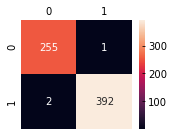

In [459]:
tmp = np.zeros([650, 2])
tmp[:, 1] = pred
tmp[:, 0][pred == 0] = 1
class_neg_accuracy, class_pos_accuracy, tp, tn, fp, fn = metric(tmp, label)

cm = np.zeros([2, 2])
cm[0][0], cm[0][1], cm[1][0], cm[1][1] = tp, fn, fp+1, tn+6
f,ax=plt.subplots(figsize=(2.5, 2))
sns.heatmap(cm,annot=True,ax=ax, fmt='.20g') #画热力图
# ax.set_title('Confusion Matrix') #标题
# ax.set_xlabel('Predicted label') #x轴
# ax.set_ylabel('True label') #y轴

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
ax.tick_params(bottom=False,top=False,left=False,right=False)

In [375]:
fig = plt.figure(figsize=(5, 4))

cls01 = S_[label[:, 0] == 0]
cls02 = S_[label[:, 0] == 1]
plt.scatter(S_[cls_1, 0], S_[cls_1, 1], edgecolors='purple', label='Class 1')
plt.scatter(S_[cls_2, 0], S_[cls_2, 1], edgecolors='g', label='Class 2')
# plt.scatter(cls02[:, 0], cls02[:, 1], edgecolors='purple', label='Class 1')
# plt.scatter(cls01[:, 0], cls01[:, 1], edgecolors='g', label='Class 2')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# 设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=8)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]

font_legend = {'family':'Arial','weight':'normal','size':10}
font_label = {'family': 'Arial', 'weight': 'bold', 'size': 11}
font_title = {'family': 'Arial', 'weight': 'bold', 'size': 15}

plt.legend(loc='upper left', prop = font)
plt.xlabel('Component 1', font_label)
plt.ylabel('Component 2', font_label)
# plt.title('Kernel K-Means Clustering based ICA', font_title)
plt.title('After ICA', font_title)

Text(0.5, 1.0, 'After ICA')

## K-NN

In [203]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.7, stratify=label, random_state=69)

# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
feature_std = standarScaler.transform(feature)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [204]:
# 模型训练和测试
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(feature_std,label)
# score = knn_clf.score(X_test_std, y_test)
y_predict = knn_clf.predict(feature_std)

In [205]:
cls_1_KNN = knn_clf.predict(feature_std)[:, 1] == 0
cls_2_KNN = knn_clf.predict(feature_std)[:, 1] == 1

In [199]:
# cm = confusion_matrix(y_predict[:, 1], y_test[:, 1])
class_neg_accuracy, class_pos_accuracy, tp, tn, fp, fn = metric(y_predict,label)

cm = np.zeros([2, 2])
cm[0][0], cm[0][1], cm[1][0], cm[1][1] = tp, fn, fp, tn

f,ax=plt.subplots(figsize=(2.5, 2))
sns.heatmap(cm,annot=True,ax=ax, fmt='.20g') #画热力图
# ax.set_title('Confusion Matrix') #标题
# ax.set_xlabel('Predicted label') #x轴
# ax.set_ylabel('True label') #y轴

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
# ax.set_xticks(['Class 1', 'Class 2'])
# ax.set_yticks(['Class 1', 'Class 2'])
ax.tick_params(bottom=False,top=False,left=False,right=False)

In [200]:
def metric(p, t, threshold=0.5):
    batch_size, num_class = p.shape
    tp = ((p[:,1] + t[:,1]) == 2).sum(0)
    tn = ((p[:,0] + t[:,0]) == 2).sum(0)
    false_cls = np.where(t[:,0] == 1)
    true_cls = np.where(t[:,1] == 1)
    fp = (p[false_cls][1] == 1).sum(0)
    fn = (p[true_cls][0] == 1).sum(0)

    class_neg_accuracy = tn / (fn+tn)
    class_pos_accuracy = tp / (tp+fp)
    
    return class_neg_accuracy, class_pos_accuracy, tp, tn, fp, fn

## K-Means

In [145]:
with open(features_path, 'r') as f:
    feature = np.array([i.split(',')[6:-4] for i in f.readlines()[1:]])
feature = feature.astype(np.float32)
x = np.zeros([650,2])
x[:, 0], x[:, 1] = np.log10(feature[:,0]), np.log10(feature[:,3])
with open(label_path, 'r') as f:
    label = np.array([i.strip() for i in f.readlines()[1:]])
label = label.astype(np.float32).reshape(-1, 1)

In [285]:
kmeans = KMeans(n_clusters=2, random_state=69)
kmeans.fit(x)
y_pre = kmeans.labels_
cls_2_KM = y_pre == 0
cls_1_KM = y_pre == 1

In [ ]:
tmp = np.zeros([650, 2])
tmp[:, 0] = y_pre
tmp[:, 1][y_pre == 0] = 1

# cm = confusion_matrix(y_predict[:, 1], y_test[:, 1])
class_neg_accuracy, class_pos_accuracy, tp, tn, fp, fn = metric(tmp,label)

cm = np.zeros([2, 2])
cm[0][0], cm[0][1], cm[1][0], cm[1][1] = tp, fn, fp, tn

f,ax=plt.subplots(figsize=(2.5, 2))
sns.heatmap(cm,annot=True,ax=ax, fmt='.20g') #画热力图
# ax.set_title('Confusion Matrix') #标题
# ax.set_xlabel('Predicted label') #x轴
# ax.set_ylabel('True label') #y轴

ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
# ax.set_xticks(['Class 1', 'Class 2'])
# ax.set_yticks(['Class 1', 'Class 2'])
ax.tick_params(bottom=False,top=False,left=False,right=False)

## SVM

In [461]:
x = np.zeros([650,2])
x[:, 0], x[:, 1] = np.log10(feature[:,0]), np.log10(feature[:,3])

# 测试集与训练集分离，测试集为20%的总数据
X_train, X_test, y_train, y_test = train_test_split(x, label, test_size=0.5, stratify=label, random_state=69)

# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
x_std = standarScaler.transform(x)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [462]:
svm=SVC(kernel='rbf',C=10,gamma=0.1,probability=True).fit(X_train_std,y_train[:, 0])
pre = svm.predict(x_std)
cls_1 = pre == 1
cls_2 = pre == 0
# print(svm.predict(X_test_std))
# print(svm.predict_proba(X_test_std))
print(svm.score(X_test_std, y_test[:, 0]))

0.9907692307692307


In [ ]:
y_score = svm.decision_function(X_test_std)
acu_curve(y_test[:, 0], y_score)

In [472]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
 
    plt.show()

## Feature analyze

In [ ]:
df = pd.DataFrame(feature)
df.columns = ['Amp','RiseT','Dur','Eny','RMS','Counts']
df['Counts/Dur'] = df['Counts'] / df['Dur']
df['RiseT/Dur'] = df['RiseT'] / df['Dur']
df['Eny/Dur'] = df['Eny'] / df['Dur']
df['Amp*RiseT'] = df['Amp'] * df['RiseT']
feature_new = df[['Eny', 'Amp*RiseT', 'Dur', 'RMS', 'Counts/Dur', 'RiseT/Dur']].values
df.head()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.xticks(rotation=-45)
plt.yticks(rotation=-45)
ax.tick_params(bottom=False,top=False,left=False,right=False)

## NN

In [486]:
def readcsv(files):
    csvfile = open(files, 'r')
    plots = csv.reader(csvfile, delimiter=',')
    x = []
    y = []
    for row in plots:
        y.append((row[2])) 
        x.append((row[1]))
    return x ,y

In [587]:
path = r'C:\Users\Yuan\Desktop\cls\6_2_select'
os.chdir(path)
train_loss = r'run-.-tag-train_loss.csv'
valid_loss = r'run-.-tag-valid_loss.csv'
valid_accuracy = r'run-.-tag-valid_accuracy.csv'
valid_class_0_accuracy = r'run-.-tag-valid_class_0_accuracy.csv'
valid_class_1_accuracy = r'run-.-tag-valid_class_1_accuracy.csv'
x, tr_loss = readcsv(train_loss)
_, val_loss = readcsv(valid_loss)
_, accuracy = readcsv(valid_accuracy)
_, cls0_accuracy = readcsv(valid_class_0_accuracy)
_, cls1_accuracy = readcsv(valid_class_1_accuracy)

In [588]:
len(x), len(tr_loss)

(150, 150)

In [589]:
tr_loss = [float(i) for i in tr_loss[1:]]
val_loss = [float(i) for i in val_loss[1:]]
accuracy = [float(i) for i in accuracy[1:]]
cls0_accuracy = [float(i) for i in cls0_accuracy[1:]]
cls1_accuracy = [float(i) for i in cls1_accuracy[1:]]

In [590]:
plt.figure(figsize=[8, 6])
plt.plot(x[1:], accuracy, 'r', label='Accuracy')
plt.plot(x[1:], cls0_accuracy, 'b', label='Class 0')
plt.plot(x[1:], cls1_accuracy, 'g', label='Class 1')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

font_legend = {'family':'DejaVu Sans','weight':'normal','size':15}
font_label = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 20}
font_title = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 30}

# 设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('DejaVu Sans') for label in labels]

plt.xlim(-5, 90)
plt.xticks(range(0, 149, 29), labels=['1', '30', '60', '90', '120', '150'])
plt.ylabel('Accuracy', font_label)
plt.xlabel('Epoch', font_label)
plt.legend(loc="lower right", prop=font_legend)

In [592]:
plt.figure(figsize=[8, 6])
plt.plot(x[1:], tr_loss, 'r', label='Train')
plt.plot(x[1:], val_loss, 'b', label='Validation')
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

font_legend = {'family':'DejaVu Sans','weight':'normal','size':15}
font_label = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 20}
font_title = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 30}

# 设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('DejaVu Sans') for label in labels]

plt.xlim(-5, 150)
plt.xticks(range(0, 149, 29), labels=['1', '30', '60', '90', '120', '150'])
plt.ylabel('MSELoss', font_label)
plt.xlabel('Epoch', font_label)
plt.legend(loc="upper right", prop=font_legend)

## Kernel-KMeans

In [125]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state

In [479]:
class KernelKMeans(BaseEstimator, ClusterMixin):
    """
    Kernel K-means
    
    Reference
    ---------
    Kernel k-means, Spectral Clustering and Normalized Cuts.
    Inderjit S. Dhillon, Yuqiang Guan, Brian Kulis.
    KDD 2004.
    """

    def __init__(self, n_clusters=3, max_iter=50, tol=1e-3, random_state=None,
                 kernel="rbf", gamma=None, degree=3, coef0=1,
                 kernel_params=None, verbose=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.verbose = verbose
        
    @property
    def _pairwise(self):
        return self.kernel == "precomputed"

    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, y=None, sample_weight=None):
        n_samples = X.shape[0]

        K = self._get_kernel(X)

        sw = sample_weight if sample_weight else np.ones(n_samples)
        self.sample_weight_ = sw

        rs = check_random_state(self.random_state)
        self.labels_ = rs.randint(self.n_clusters, size=n_samples)

        dist = np.zeros((n_samples, self.n_clusters))
        self.within_distances_ = np.zeros(self.n_clusters)

        for it in range(self.max_iter):
            dist.fill(0)
            self._compute_dist(K, dist, self.within_distances_,
                               update_within=True)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)

            # Compute the number of samples whose cluster did not change 
            # since last iteration.
            n_same = np.sum((self.labels_ - labels_old) == 0)
            if 1 - float(n_same) / n_samples < self.tol:
                if self.verbose:
                    print("Converged at iteration", it + 1)
                break

        self.X_fit_ = X

        return self

    def _compute_dist(self, K, dist, within_distances, update_within):
        """Compute a n_samples x n_clusters distance matrix using the 
        kernel trick."""
        sw = self.sample_weight_

        for j in range(self.n_clusters):
            mask = self.labels_ == j

            if np.sum(mask) == 0:
                raise ValueError("Empty cluster found, try smaller n_cluster.")

            denom = sw[mask].sum()
            denomsq = denom * denom

            if update_within:
                KK = K[mask][:, mask]  # K[mask, mask] does not work.
                dist_j = np.sum(np.outer(sw[mask], sw[mask]) * KK / denomsq)
                within_distances[j] = dist_j
                dist[:, j] += dist_j
            else:
                dist[:, j] += within_distances[j]

            dist[:, j] -= 2 * np.sum(sw[mask] * K[:, mask], axis=1) / denom

    def predict(self, X):
        K = self._get_kernel(X, self.X_fit_)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self._compute_dist(K, dist, self.within_distances_,
                           update_within=False)
        return dist.argmin(axis=1)

In [546]:
km = KernelKMeans(n_clusters=2, max_iter=100, random_state=55, verbose=1, kernel="rbf")
# print(km.fit_predict(x)[:10])
# print(km.predict(x[:10]))
pred = km.fit_predict(S_)
cls_1_KKM = pred == 1
cls_2_KKM = pred == 0

Converged at iteration 11
